# Preliminaries

In [32]:
!python --version

Python 3.8.13


<br>

## Environment

In [33]:
import os
import pathlib

<br>

Set path

In [34]:
os.chdir(path=str(pathlib.Path(os.getcwd()).parent))
os.getcwd()

'J:\\library\\plausibilities'

<br>

## Libraries

In [35]:
%matplotlib inline

In [36]:
import logging
import collections

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import numpy as np
import pandas as pd
import seaborn as sns

import arviz as az
import pymc as pm
import xarray as xr
import aesara.tensor as at
import graphviz

<br>

## Custom

In [37]:
import src.graphics.settings
import src.graphics.sketch
import src.graphics.models

import src.data.radioactivity
import src.data.features
import src.data.coordinates
import src.data.frequencies

import src.models.complete
import src.models.individual
import src.models.unpooled
import src.models.partial
import src.models.vi
import src.models.va
import src.models.rva

import src.models.inference
import src.models.mapping


<br>

## Settings



Aesthetics

In [38]:
settings = src.graphics.settings.Settings()

settings.layout()
settings.aesthetics()

<br>

For diagrams/figures
* The `Labels` class is for `sketch.annotation(ax, Labels(title='...', xlabel='...', ylabel='...'))`

In [39]:
sketch = src.graphics.sketch.Sketch()
Labels = collections.namedtuple(typename='Labels', field_names=['title', 'xlabel', 'ylabel'])

<br>

For the DAG (directed acyclic graph) of models

In [40]:
path = os.path.join(os.getcwd(), 'notebooks')
dag = src.graphics.models.Models(path=path)

<br>

Seed

In [41]:
RANDOM_SEED = 8924

<br>

## Logging

In [42]:
logging.basicConfig(level=logging.INFO, 
                    format='\n%(message)s\n%(asctime)s.%(msecs)03d\n', 
                    datefmt='%Y-%m-%d %H:%M:%S')
logger = logging.getLogger(__name__)

<br>
<br>

# Data

Excerpt: Focusing on Minnesota, MN, dwellings.

In [43]:
excerpt = src.data.radioactivity.Radioactivity().exc(state='MN')

<br>

Extra features

In [44]:
excerpt = src.data.features.Features().exc(data=excerpt)
logger.info(f'# of instances: {excerpt.shape}')
logger.info(f"# of unique codes: {excerpt['idnum'].unique().shape}")


# of instances: (919, 29)
2022-12-03 20:29:13.288


# of unique codes: (919,)
2022-12-03 20:29:13.289



<br>

Frequencies

In [45]:
frequencies = src.data.frequencies.Frequencies().county(data=excerpt)
logger.info(frequencies.head())


   county  countyindex  floor   N
0  AITKIN            0      0   3
1  AITKIN            0      1   1
2   ANOKA            1      0  49
3   ANOKA            1      1   3
4  BECKER            2      0   1
2022-12-03 20:29:13.306



<br>
<br>

# Exploratory Graphs

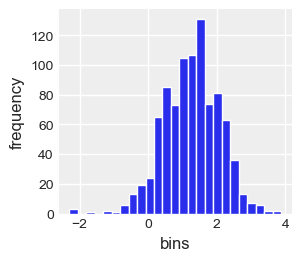

In [46]:
ax = sketch.figure(width=2.9, height=2.5)
ax.hist(excerpt.ln_radon, bins=25)
sketch.annotation(ax, Labels(title='', xlabel='bins', ylabel='frequency'))

<br>
<br>

# Models

The model's initial co$\ddot{o}$rdinates

In [47]:
coords = src.data.coordinates.Coordinates(data=excerpt).exc()
logger.info(coords)


{'Level': {'Basement': 0, 'Ground': 1}, 'County': {'AITKIN': 0, 'ANOKA': 1, 'BECKER': 2, 'BELTRAMI': 3, 'BENTON': 4, 'BIG STONE': 5, 'BLUE EARTH': 6, 'BROWN': 7, 'CARLTON': 8, 'CARVER': 9, 'CASS': 10, 'CHIPPEWA': 11, 'CHISAGO': 12, 'CLAY': 13, 'CLEARWATER': 14, 'COOK': 15, 'COTTONWOOD': 16, 'CROW WING': 17, 'DAKOTA': 18, 'DODGE': 19, 'DOUGLAS': 20, 'FARIBAULT': 21, 'FILLMORE': 22, 'FREEBORN': 23, 'GOODHUE': 24, 'HENNEPIN': 25, 'HOUSTON': 26, 'HUBBARD': 27, 'ISANTI': 28, 'ITASCA': 29, 'JACKSON': 30, 'KANABEC': 31, 'KANDIYOHI': 32, 'KITTSON': 33, 'KOOCHICHING': 34, 'LAC QUI PARLE': 35, 'LAKE': 36, 'LAKE OF THE WOODS': 37, 'LE SUEUR': 38, 'LINCOLN': 39, 'LYON': 40, 'MAHNOMEN': 41, 'MARSHALL': 42, 'MARTIN': 43, 'MCLEOD': 44, 'MEEKER': 45, 'MILLE LACS': 46, 'MORRISON': 47, 'MOWER': 48, 'MURRAY': 49, 'NICOLLET': 50, 'NOBLES': 51, 'NORMAN': 52, 'OLMSTED': 53, 'OTTER TAIL': 54, 'PENNINGTON': 55, 'PINE': 56, 'PIPESTONE': 57, 'POLK': 58, 'POPE': 59, 'RAMSEY': 60, 'REDWOOD': 61, 'RENVILLE': 62, 

<br>
<br>

## Complete

Add more notes:

* A simple linear regression model: an intercept, a gradient whereby the accompanying independent variable is *dwelling level*, i.e., basement or ground level.
* The dependent variable is *ln(radon)*
* Is the *intercept* implicit below?



<br>

### Model


The model

In [48]:
complete = src.models.complete.Complete(coords=coords, seed=RANDOM_SEED).exc(data=excerpt)


The shape of mu, whereby mu = measures[levelcode]: (919,)
2022-12-03 20:29:14.219


y
2022-12-03 20:29:14.241



<br>

An illustration of model

* Similarly: `pm.model_to_graphviz(complete)`

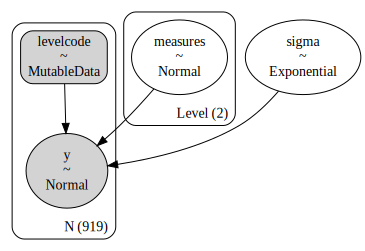

In [49]:
name = 'complete.gv'
dag.exc(model=complete, name=name)
graphviz.Source.from_file(filename=os.path.join(path, name))

<br>
<br>

### Inference

* `inferences.keys()`

* `inferences.get('prior').keys()`


In [50]:
complete_ = src.models.inference.Inference(model=complete).exc()

Auto-assigning NUTS sampler...

Auto-assigning NUTS sampler...
2022-12-03 20:29:15.348

Initializing NUTS using jitter+adapt_diag...

Initializing NUTS using jitter+adapt_diag...
2022-12-03 20:29:15.349

Multiprocess sampling (4 chains in 4 jobs)

Multiprocess sampling (4 chains in 4 jobs)
2022-12-03 20:29:18.573

NUTS: [measures, sigma]

NUTS: [measures, sigma]
2022-12-03 20:29:18.575



Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 30 seconds.

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 30 seconds.
2022-12-03 20:29:48.744

Sampling: [measures, sigma, y]

Sampling: [measures, sigma, y]
2022-12-03 20:29:54.637

Sampling: [y]

Sampling: [y]
2022-12-03 20:29:54.800



In [51]:
complete_ = src.models.mapping.Mapping(inferences=complete_, coords=coords).exc()

In [52]:
complete_

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data

<br>
<br>

### Prior Measures

<br>

**Prior Measures: Distributions**



In [53]:
computations = []

for k, v in coords['Level'].items():
    
    points = complete_.prior['measures'].sel(Level=k).squeeze()
    
    instances = pd.DataFrame(data={'measures': points, 'level': np.repeat(v, points.shape[0]), 'type': np.repeat(k, points.shape[0])})
    
    computations.append(instances)

instances = pd.concat(computations, axis=0, ignore_index=True)

logger.info(instances.head())


    measures  level      type
0  -5.460342      0  Basement
1   8.773777      0  Basement
2  12.177130      0  Basement
3 -16.282805      0  Basement
4  -5.190488      0  Basement
2022-12-03 20:29:55.801



<br>

The graph

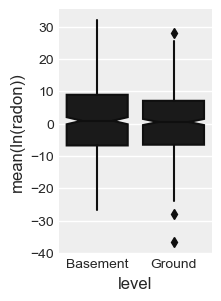

In [54]:
ax = sketch.figure(width=2.1, height=2.9)
sns.boxplot(data=instances, x='type', y='measures', notch=True, color='k', showcaps=False, ax=ax)
sketch.annotation(ax, Labels(title='', xlabel='level', ylabel='mean(ln(radon))'))

<br>
<br>

### Prior Predictive

In [55]:
complete_.prior_predictive

<xarray.Dataset>
Dimensions:  (chain: 1, draw: 500, N: 919)
Coordinates:
  * chain    (chain) int32 0
  * draw     (draw) int32 0 1 2 3 4 5 6 7 8 ... 492 493 494 495 496 497 498 499
  * N        (N) int32 0 1 2 3 4 5 6 7 8 ... 910 911 912 913 914 915 916 917 918
Data variables:
    y        (chain, draw, N) float64 7.925 -6.029 -5.403 ... 11.2 10.86 11.55
Attributes:
    created_at:                 2022-12-03T20:29:54.755656
    arviz_version:              0.13.0
    inference_library:          pymc
    inference_library_version:  4.3.0

<br>
<br>

### Posterior Measures


Notes/references:

* [About `arviz.hdi(.)`](https://arviz-devs.github.io/arviz/api/generated/arviz.hdi.html)

* [About `xarray.DataArray`](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.html#xarray.DataArray)

* [xarray.DataArray.groupy](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.groupby.html#xarray.DataArray.groupby)

* cf. `trace.constant_data['level']` & `trace.constant_data['N']`


<br>

**Posterior Measures: Distributions**

In [56]:
computations = []

for k, v in coords['Level'].items():
    
    points = complete_.posterior['measures'].mean(dim=('chain')).sel(Level=k).squeeze()
    
    instances = pd.DataFrame(data={'measures': points, 'level': np.repeat(v, points.shape[0]), 'type': np.repeat(k, points.shape[0])})
    
    computations.append(instances)

instances = pd.concat(computations, axis=0, ignore_index=True)

logger.info(instances.tail())


      measures  level    type
1995  0.786128      1  Ground
1996  0.788162      1  Ground
1997  0.737027      1  Ground
1998  0.784764      1  Ground
1999  0.833502      1  Ground
2022-12-03 20:29:56.247



<br>

The distributions

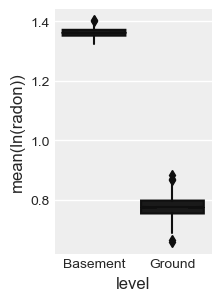

In [57]:
ax = sketch.figure(width=2.1, height=2.9)
sns.boxplot(data=instances, x='type', y='measures', notch=True, color='k', showcaps=False, ax=ax)
sketch.annotation(ax, Labels(title='', xlabel='level', ylabel='mean(ln(radon))'))

<br>
<br>

**Posterior Measures & Standard Deviations: Summaries**

In [58]:
az.summary(complete_)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
measures[Basement]  1.362  0.028   1.312    1.415      0.000    0.000   
measures[Ground]    0.776  0.065   0.656    0.898      0.001    0.001   
sigma               0.791  0.019   0.755    0.826      0.000    0.000   

                    ess_bulk  ess_tail  r_hat  
measures[Basement]    5941.0    3244.0    1.0  
measures[Ground]      5826.0    3238.0    1.0  
sigma                 6426.0    3157.0    1.0

<br>
<br>

**Posterior Measures & Standard Deviations: Graphs**

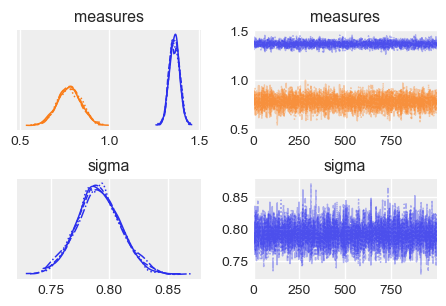

In [59]:
with complete:
    az.plot_trace(data=complete_, figsize=(4.35, 2.95))

<br>

Cf.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000013998220>,
      dtype=object)

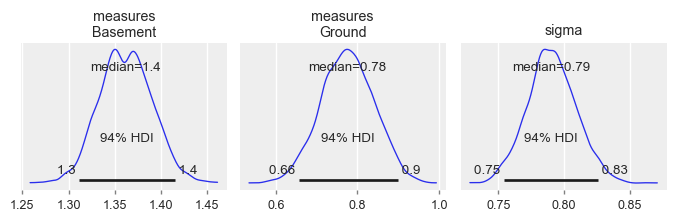

In [60]:
pm.plot_posterior(data=complete_, var_names=['measures', 'sigma'], 
                 figsize=(6.65, 2.1), grid=(1, 3), point_estimate='median', textsize=9)

<br>
<br>

**Posterior Measures Mean**

In [61]:
averages_features = complete_.posterior.mean(dim=('chain', 'draw'))
averages_features

<xarray.Dataset>
Dimensions:    (Level: 2, LevelCode: 2)
Coordinates:
  * Level      (Level) <U8 'Basement' 'Ground'
  * LevelCode  (LevelCode) int32 0 1
Data variables:
    measures   (Level) float64 1.362 0.7756
    sigma      float64 0.7909

<br>

**Posterior Measures High Density Intervals**

Herein, determining the high density posterior intervals via

> ```python
hdi_features = (
    trace.posterior['measures'].groupby(trace.posterior.LevelName).apply(
        lambda x: az.hdi(x, input_core_dims=[['chain', 'draw']]))['measures']
)
hdi_features


is unnecessarily complex, and the resulting object does not include `LevelCode` co$\ddot{o}$rdinates.

<br>


In [62]:
hdi_features = az.hdi(complete_)
hdi_features

<xarray.Dataset>
Dimensions:    (Level: 2, hdi: 2, LevelCode: 2)
Coordinates:
  * Level      (Level) <U8 'Basement' 'Ground'
  * LevelCode  (LevelCode) int32 0 1
  * hdi        (hdi) <U6 'lower' 'higher'
Data variables:
    measures   (Level, hdi) float64 1.312 1.415 0.6564 0.8983
    sigma      (hdi) float64 0.7546 0.8259

<br>
<br>

### Posterior Predictive

<br>

**Posterior Predictive Check**

Equivalent:
> ```python 
pm.plot_ppc(data=..., figsize=(2.9, 2.4), num_pp_samples=125, 
            random_seed=RANDOM_SEED, textsize=10)

> ```python 
az.plot_ppc(data=..., figsize=(2.9, 2.4), num_pp_samples=125, 
            random_seed=RANDOM_SEED, textsize=10)

<br>

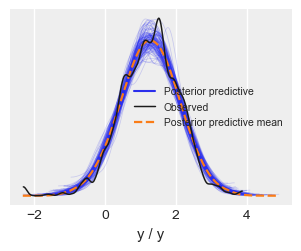

In [63]:
az.plot_ppc(data=complete_, figsize=(2.9, 2.4), num_pp_samples=125, random_seed=RANDOM_SEED, textsize=10)

<br>
<br>

**The posterior predictive high density interval per floor level type**

In [64]:
credibility = lambda x: az.hdi(x, input_core_dims=[["chain", "draw", "N"]])
hdi_predictive = (
    complete_.posterior_predictive.y.groupby(complete_.constant_data.levelcode)
    .apply(credibility)
    .y
)
hdi_predictive

<xarray.DataArray 'y' (levelcode: 2, hdi: 2)>
array([[-0.13077227,  2.84521356],
       [-0.70839416,  2.27659643]])
Coordinates:
  * hdi        (hdi) <U6 'lower' 'higher'
  * levelcode  (levelcode) int64 0 1

<br>

### Graphs

<br>

**High Density Intervals, Averages**

Options:

* `sns.scatterplot(y=complete_.observed_data['y'], x=trace.observed_data['LevelName'], ax=ax)`

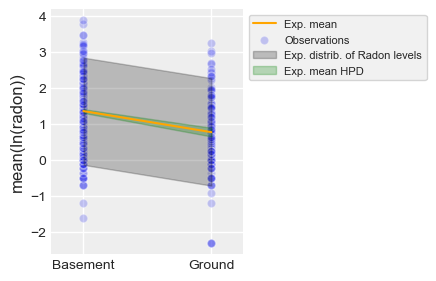

In [65]:
ax = sketch.figure(width=4.25, height=2.7)

complete_.observed_data.plot.scatter(x='LevelCode', y='y', label='Observations', alpha=0.25, ax=ax)

az.plot_hdi(hdi_predictive.levelcode.values, 
            hdi_data=hdi_predictive, 
            fill_kwargs={'alpha': 0.25, 'label': 'Exp. distrib. of Radon levels'}, 
            color='k',
            ax=ax)

az.plot_hdi(hdi_features.LevelCode.values, 
            hdi_data=hdi_features['measures'], 
            fill_kwargs={'alpha': 0.25, 'label': 'Exp. mean HPD'}, 
            color='green',
            ax=ax)

ax.plot(np.arange(averages_features.coords['Level'].shape[0]), 
        averages_features['measures'].values, 
        color='orange',
        label='Exp. mean')

sketch.annotation(ax, Labels(title='', xlabel='', ylabel='mean(ln(radon))'))

ax.set_xlim(-0.25, 1.25)

ax.set_xticks(complete_.posterior['LevelCode'].values)
ax.set_xticklabels(complete_.posterior['Level'].values, rotation=0)

ax.legend(fontsize=8, frameon=True, bbox_to_anchor=(1, 1), loc='upper left')

<br>
<br>

**Clean-up**

In [66]:
del hdi_features, averages_features, hdi_predictive

<br>

### Inference Data

In [67]:
complete_

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data

<br>
<br>

## Individual

### Model

In [68]:
individual = src.models.individual.Individual(coords=coords, seed=RANDOM_SEED).exc(data=excerpt)


likelihood
2022-12-03 20:30:04.813



<br>

An <span style='color: #808080'>illustration</span> of the model

* Similarly: `pm.model_to_graphviz(individual)`

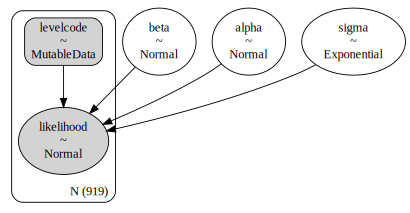

In [69]:
name = 'individual.gv'
dag.exc(model=individual, name=name)
graphviz.Source.from_file(filename=os.path.join(path, name))

<br>
<br>

### Inference

In [70]:
individual_ = src.models.inference.Inference(model=individual).exc()

Auto-assigning NUTS sampler...

Auto-assigning NUTS sampler...
2022-12-03 20:30:06.213

Initializing NUTS using jitter+adapt_diag...

Initializing NUTS using jitter+adapt_diag...
2022-12-03 20:30:06.215

Multiprocess sampling (4 chains in 4 jobs)

Multiprocess sampling (4 chains in 4 jobs)
2022-12-03 20:30:09.609

NUTS: [alpha, beta, sigma]

NUTS: [alpha, beta, sigma]
2022-12-03 20:30:09.611



Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.
2022-12-03 20:30:40.378

Sampling: [alpha, beta, likelihood, sigma]

Sampling: [alpha, beta, likelihood, sigma]
2022-12-03 20:30:46.371

Sampling: [likelihood]

Sampling: [likelihood]
2022-12-03 20:30:46.547



In [71]:
individual_.posterior = individual_.posterior.assign_coords(Level=list(coords['Level'].keys()))
individual_ = src.models.mapping.Mapping(inferences=individual_, coords=coords).exc()

<br>
<br>

### Posterior Measures

<br>
<br>

**Posterior Measures & Standard Deviations: Graphs**

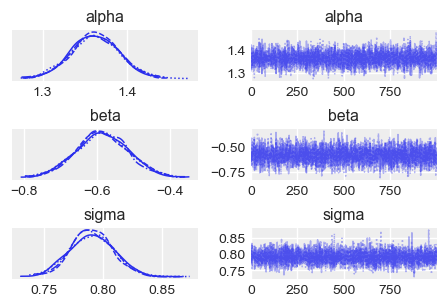

In [72]:
with individual:
    az.plot_trace(data=individual_, figsize=(4.35, 2.95)) 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009868580>,
      dtype=object)

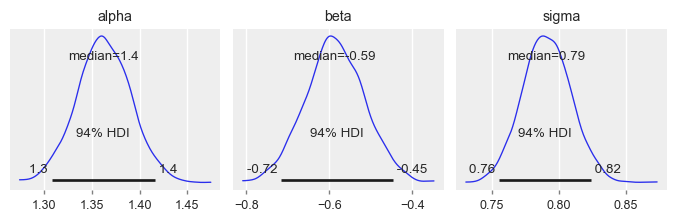

In [73]:
pm.plot_posterior(data=individual_, var_names=['alpha', 'beta', 'sigma'], 
                  figsize=(6.65, 2.1), grid=(1, 3), point_estimate='median', textsize=9)   

<br>

**Posterior Measures Mean**

In [74]:
individual_.posterior.mean(dim=('chain', 'draw'))

<xarray.Dataset>
Dimensions:    (Level: 2, LevelCode: 2)
Coordinates:
  * Level      (Level) <U8 'Basement' 'Ground'
  * LevelCode  (LevelCode) int32 0 1
Data variables:
    alpha      float64 1.362
    beta       float64 -0.5861
    sigma      float64 0.791

<br>
<br>

## Unpooled

<br>

The object `coords` has the set of distinct counties, each has a distinct index; ref. `coords['County']`.  &nbsp; In future use [an appropriate geographic code](https://www.nist.gov/system/files/documents/2021/08/11/FIPSCodesReplacementChart2015.pdf). &nbsp;  Additionally, the data object `excerpt` includes a `countyindex` field, whereby the relevant dictionary is $\rightarrow$ `coords['County']`.

> ```python
logger.info(coords.keys())
logger.info(coords.get('County'))
```


<br>

### Model

In [75]:
unpooled = src.models.unpooled.Unpooled(coords=coords, seed=RANDOM_SEED).exc(data=excerpt)


The shape of mu, whereby mu = measures[countyindex, levelcode]: (919,)
2022-12-03 20:30:52.279


y
2022-12-03 20:30:52.299



<br>
<br>

An illustration of model

* Similarly: `pm.model_to_graphviz(unpooled)`

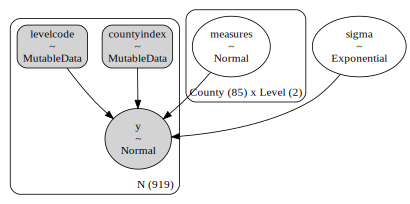

In [76]:
name = 'unpooled.gv'
dag.exc(model=unpooled, name=name)
graphviz.Source.from_file(filename=os.path.join(path, name))

<br>
<br>

### Inference

In [77]:
unpooled_ = src.models.inference.Inference(model=unpooled).exc()

Auto-assigning NUTS sampler...

Auto-assigning NUTS sampler...
2022-12-03 20:30:53.478

Initializing NUTS using jitter+adapt_diag...

Initializing NUTS using jitter+adapt_diag...
2022-12-03 20:30:53.480

Multiprocess sampling (4 chains in 4 jobs)

Multiprocess sampling (4 chains in 4 jobs)
2022-12-03 20:30:56.823

NUTS: [measures, sigma]

NUTS: [measures, sigma]
2022-12-03 20:30:56.824



Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 51 seconds.

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 51 seconds.
2022-12-03 20:31:47.815

Sampling: [measures, sigma, y]

Sampling: [measures, sigma, y]
2022-12-03 20:31:54.527

Sampling: [y]

Sampling: [y]
2022-12-03 20:31:54.706



In [78]:
unpooled_ = src.models.mapping.Mapping(inferences=unpooled_, coords=coords).exc()

In [79]:
unpooled_

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data

<br>
<br>

### Posterior Measures

<br>

**Posterior Measures & Standard Deviations: Summaries**

In [80]:
az.summary(unpooled_)

mean     sd  hdi_3%  hdi_97%  mcse_mean  \
measures[AITKIN, Basement]           0.675  0.431  -0.139    1.464      0.006   
measures[AITKIN, Ground]             0.829  0.718  -0.546    2.147      0.010   
measures[ANOKA, Basement]            0.956  0.102   0.766    1.147      0.002   
measures[ANOKA, Ground]             -0.127  0.410  -0.915    0.625      0.006   
measures[BECKER, Basement]           1.484  0.722   0.141    2.846      0.010   
...                                    ...    ...     ...      ...        ...   
measures[WRIGHT, Basement]           1.672  0.209   1.293    2.075      0.003   
measures[WRIGHT, Ground]             0.871  0.731  -0.535    2.222      0.011   
measures[YELLOW MEDICINE, Basement]  1.220  0.504   0.258    2.150      0.007   
measures[YELLOW MEDICINE, Ground]    0.003  9.841 -17.755   19.159      0.145   
sigma                                0.718  0.018   0.683    0.751      0.000   

                                     mcse_sd  ess_bulk  ess_tail  r_hat  
measures[AITKIN, Basement]             0.005    4544.0    2538.0    1.0  
measures[AITKIN, Ground]               0.009    5235.0    2996.0    1.0  
measures[ANOKA, Basement]              0.001    4562.0    2837.0    1.0  
measures[ANOKA, Ground]                0.007    4644.0    2394.0    1.0  
measures[BECKER, Basement]             0.008    4751.0    2786.0    1.0  
...                                      ...       ...       ...    ...  
measures[WRIGHT, Basement]             0.002    4581.0    2770.0    1.0  
measures[WRIGHT, Ground]               0.009    4693.0    2578.0    1.0  
measures[YELLOW MEDICINE, Basement]    0.006    4543.0    2750.0    1.0  
measures[YELLOW MEDICINE, Ground]      0.170    4613.0    2636.0    1.0  
sigma                                  0.000    3901.0    2970.0    1.0  

[171 rows x 9 columns]

<br>

<br>

**Posterior Measures & Standard Deviations: Graphs**

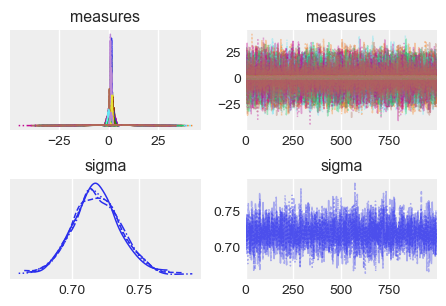

In [81]:
with unpooled:
    az.plot_trace(data=unpooled_, figsize=(4.35, 2.95))

<br>
<br>

**Posterior Measures: High Density Intervals**

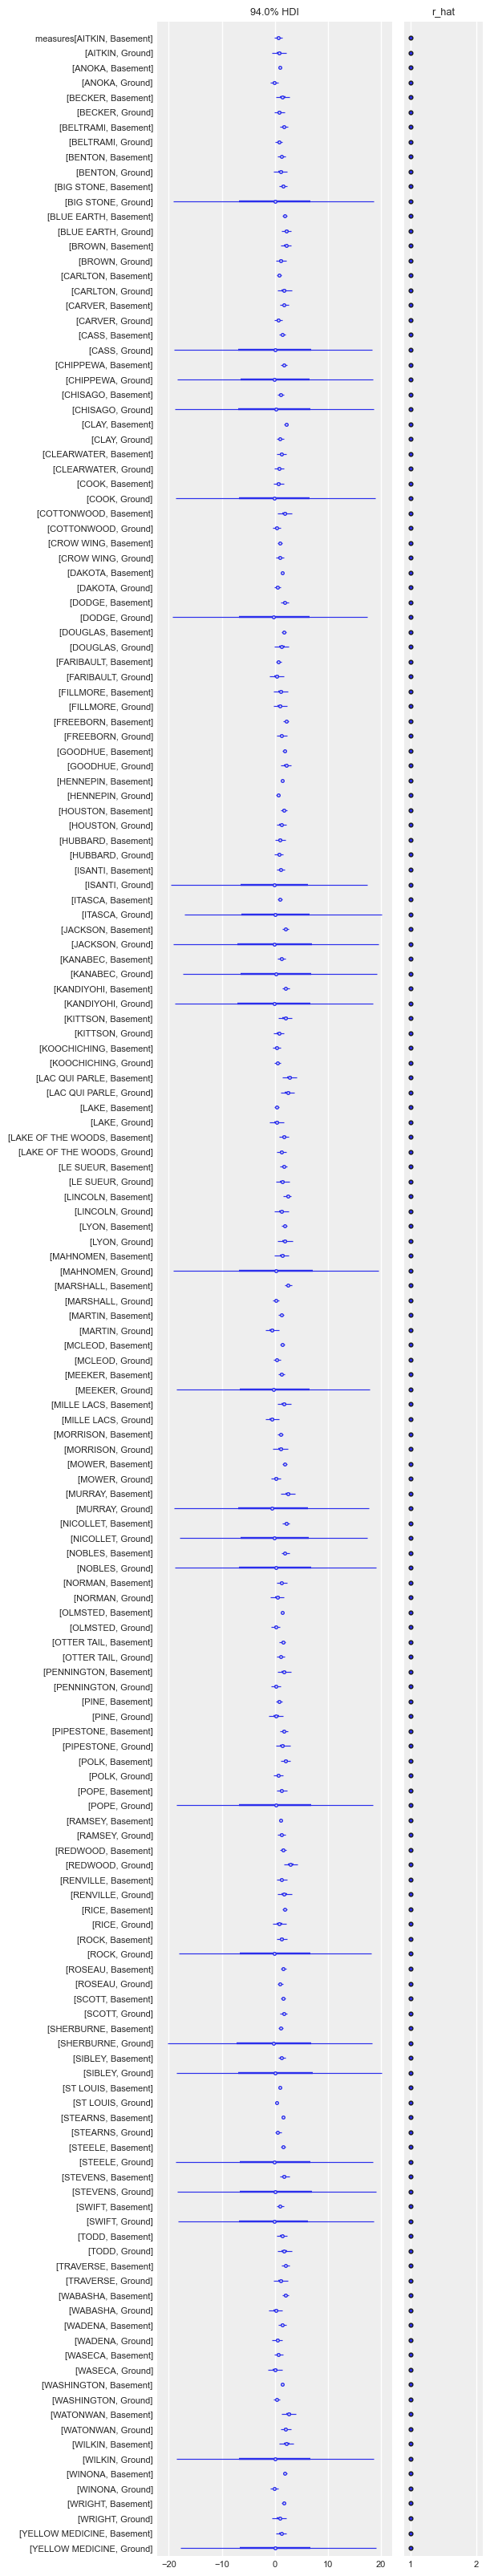

In [82]:
az.plot_forest(
    unpooled_, var_names='measures', figsize=(6, 32), r_hat=True, combined=True, textsize=8
);

<br>

**Posterior Mean**

In [83]:
averages_features = unpooled_.posterior.mean(dim=('chain', 'draw'))
averages_features

<xarray.Dataset>
Dimensions:      (County: 85, Level: 2, LevelCode: 2, CountyIndex: 85)
Coordinates:
  * County       (County) <U17 'AITKIN' 'ANOKA' ... 'WRIGHT' 'YELLOW MEDICINE'
  * Level        (Level) <U8 'Basement' 'Ground'
  * LevelCode    (LevelCode) int32 0 1
  * CountyIndex  (CountyIndex) int32 0 1 2 3 4 5 6 7 ... 77 78 79 80 81 82 83 84
Data variables:
    measures     (County, Level) float64 0.6753 0.8291 0.9561 ... 1.22 0.002926
    sigma        float64 0.7184

<br>

**Posterior Check**

In [84]:
hdi_features = az.hdi(unpooled_)
hdi_features

<xarray.Dataset>
Dimensions:      (County: 85, Level: 2, hdi: 2, LevelCode: 2, CountyIndex: 85)
Coordinates:
  * County       (County) <U17 'AITKIN' 'ANOKA' ... 'WRIGHT' 'YELLOW MEDICINE'
  * Level        (Level) <U8 'Basement' 'Ground'
  * LevelCode    (LevelCode) int32 0 1
  * CountyIndex  (CountyIndex) int32 0 1 2 3 4 5 6 7 ... 77 78 79 80 81 82 83 84
  * hdi          (hdi) <U6 'lower' 'higher'
Data variables:
    measures     (County, Level, hdi) float64 -0.1395 1.464 ... -17.75 19.16
    sigma        (hdi) float64 0.6834 0.7514

<br>
<br>

### Graphs

<br>

**High Density Intervals, Averages**

For more about `sel(.)` visit [arviz.InferenceData.sel(.)](https://python.arviz.org/en/latest/api/generated/arviz.InferenceData.sel.html).  &nbsp; The # of counties is

> ```python 
len(coords.get('County'))


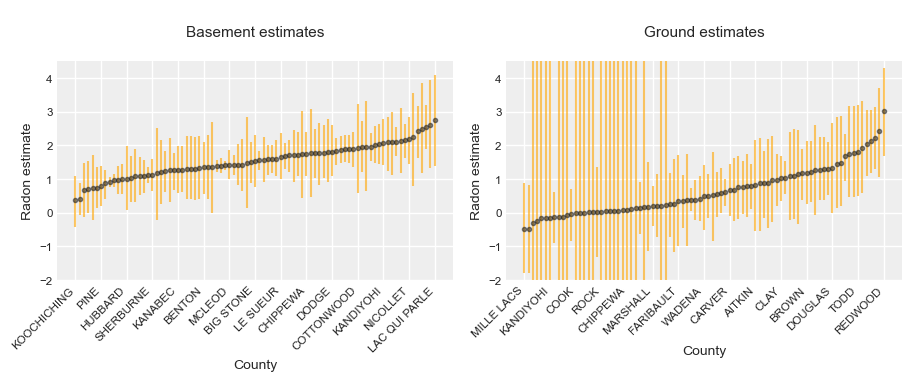

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(9, 3.7))

xticks = np.arange(0, 86, 6)

fontdict = {'horizontalalignment': 'right', 'fontsize': 8}

for ax, level in zip(axes, ['Basement', 'Ground']):
    
    averages_ = averages_features.sel(Level=level).sortby('measures')
    
    # the HDI limits per County ordered by increasing average, i.e., as above
    hdi_ = hdi_features.sel(Level=level).sortby(averages_.measures)
    
    # the scatter plot of the average value per County
    ax.plot(averages_['County'].values, averages_['measures'].values, 'ok', markersize=3, alpha=0.5);
    
    # high density interval lines
    ax.vlines(
        np.arange(len(coords.get('County'))),
        hdi_.measures.sel(hdi='lower'),
        hdi_.measures.sel(hdi='higher'),
        color='orange',
        alpha=0.6,
    )    
    
    # titles
    ax.set_title(f'\n{level.title()} estimates\n', fontsize=11)
    
    # x ticks
    ax.set_xticks(xticks)
    ax.set_xticklabels(averages_.County.values[xticks], horizontalalignment='right', rotation=45)
    
    # all ticks
    ax.tick_params(labelsize='x-small')
    
    # limits
    ax.set_ylim(bottom=-2, top=4.5)
    
    # labels
    ax.set_xlabel('County', fontsize=10)
    ax.set_ylabel('Radon estimate', fontsize=10)
    

<br>
<br>

**Ground Level Dispersions of High Density Intervals**

Ground level posterior `measures`  high density interval data

In [86]:
experiment = hdi_features['measures'].sel(Level='Ground')

<br>

Hence, the differences and their parallel county names

In [87]:
differences = pd.DataFrame(data={'difference': experiment.sel(hdi='higher') - experiment.sel(hdi='lower'), 
                                 'county': experiment['County']})

<br>

Differences and frequencies.

In [88]:
values = frequencies.loc[frequencies['floor'] == coords['Level']['Ground'], ]
dispersions = differences.merge(values, how='left', on='county')
logger.info(dispersions.tail())


    difference           county  countyindex  floor    N
80    1.971600         WATONWAN         80.0    1.0  2.0
81   37.171906           WILKIN          NaN    NaN  NaN
82    1.539952           WINONA         82.0    1.0  3.0
83    2.756540           WRIGHT         83.0    1.0  1.0
84   36.913702  YELLOW MEDICINE          NaN    NaN  NaN
2022-12-03 20:32:29.047



<br>

Some counties do not have any ground level data points

In [89]:
dispersions.loc[:, 'N'] = dispersions['N'].fillna(value=0).array
logger.info(dispersions.tail())


    difference           county  countyindex  floor    N
80    1.971600         WATONWAN         80.0    1.0  2.0
81   37.171906           WILKIN          NaN    NaN  0.0
82    1.539952           WINONA         82.0    1.0  3.0
83    2.756540           WRIGHT         83.0    1.0  1.0
84   36.913702  YELLOW MEDICINE          NaN    NaN  0.0
2022-12-03 20:32:29.060



<br>

The graph below illustrates that the large dispersions, intervals, are due counties that do not have data points.

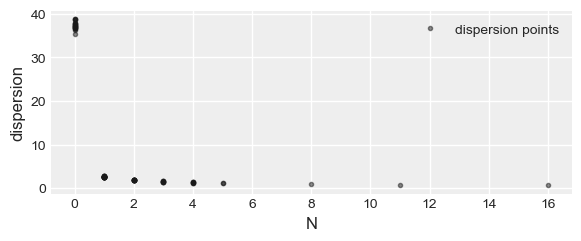

In [90]:
ax = sketch.figure(width=5.7, height=2.3)

ax.plot(dispersions['N'].array, dispersions['difference'].array, 'ok', markersize=3, alpha=0.5, label='dispersion points');
sketch.annotation(ax, Labels(title='', xlabel='N', ylabel='dispersion'))
ax.legend(loc='upper right', fontsize='small');

<br>
<br>

**Funnel**

Upcoming

<br>
<br>

**Estimates**

Upcoming

In [91]:
averages_features['measures'].sel(County='AITKIN')

<xarray.DataArray 'measures' (Level: 2)>
array([0.67528454, 0.82907638])
Coordinates:
    County   <U17 'AITKIN'
  * Level    (Level) <U8 'Basement' 'Ground'

In [92]:
unpooled_.observed_data['y'][unpooled_.observed_data.coords['County'] == 'AITKIN']

<xarray.DataArray 'y' (N: 4)>
array([0.83290912, 1.09861229, 0.09531018, 0.83290912])
Coordinates:
  * N            (N) int32 1 2 3 0
    Level        (N) <U8 'Basement' 'Basement' 'Basement' 'Ground'
    LevelCode    (N) int32 0 0 0 1
    County       (N) <U17 'AITKIN' 'AITKIN' 'AITKIN' 'AITKIN'
    CountyIndex  (N) int32 0 0 0 0

<br>
<br>

**Clean-up**

In [93]:
del hdi_features, hdi_, averages_features, averages_

<br>
<br>

### Inference Data

In [94]:
unpooled_

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data

<br>
<br>
<br>

## Partial

### Model

In [95]:
partial = src.models.partial.Partial(coords=coords, seed=RANDOM_SEED).exc(data=excerpt)


The shape of mu, whereby mu = intercepts[countyindex]: (919,)
2022-12-03 20:32:30.255


likelihood
2022-12-03 20:32:30.276



<br>

An illustration of model

* Similarly: `pm.model_to_graphviz(partial)`

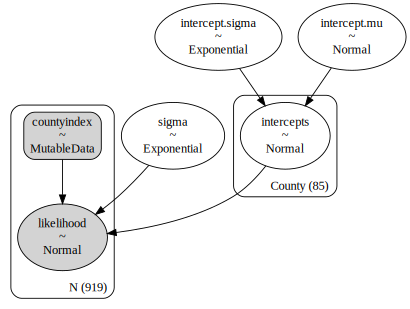

In [96]:
name = 'partial.gv'
dag.exc(model=partial, name=name)
graphviz.Source.from_file(filename=os.path.join(path, name))

<br>
<br>

### Inference

In [97]:
partial_ = src.models.inference.Inference(model=partial).exc()

Auto-assigning NUTS sampler...

Auto-assigning NUTS sampler...
2022-12-03 20:32:32.291

Initializing NUTS using jitter+adapt_diag...

Initializing NUTS using jitter+adapt_diag...
2022-12-03 20:32:32.292

Multiprocess sampling (4 chains in 4 jobs)

Multiprocess sampling (4 chains in 4 jobs)
2022-12-03 20:32:36.741

NUTS: [intercept.mu, intercept.sigma, intercepts, sigma]

NUTS: [intercept.mu, intercept.sigma, intercepts, sigma]
2022-12-03 20:32:36.742



Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 38 seconds.

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 38 seconds.
2022-12-03 20:33:14.938

Sampling: [intercept.mu, intercept.sigma, intercepts, likelihood, sigma]

Sampling: [intercept.mu, intercept.sigma, intercepts, likelihood, sigma]
2022-12-03 20:33:21.636

Sampling: [likelihood]

Sampling: [likelihood]
2022-12-03 20:33:21.826



In [98]:
partial_

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data

<br>

Enrich

In [99]:
partial_ = src.models.mapping.Mapping(inferences=partial_, coords=coords).exc()

In [100]:
partial_

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data

<br>
<br>

### Posterior Measures

<br>

**Preliminaries**

The frequencies

In [101]:
logger.info(frequencies.head())


   county  countyindex  floor   N
0  AITKIN            0      0   3
1  AITKIN            0      1   1
2   ANOKA            1      0  49
3   ANOKA            1      1   3
4  BECKER            2      0   1
2022-12-03 20:33:23.013



<br>

Tallies by county only.

In [102]:
T = frequencies.groupby(by=['county', 'countyindex']).agg(N=('N', sum))
T.reset_index(drop=False, inplace=True)
K = T.copy().set_index(keys='countyindex')

logger.info(T.tail())
logger.info(K.tail())


             county  countyindex   N
80         WATONWAN           80   3
81           WILKIN           81   1
82           WINONA           82  13
83           WRIGHT           83  13
84  YELLOW MEDICINE           84   2
2022-12-03 20:33:23.039


                      county   N
countyindex                     
80                  WATONWAN   3
81                    WILKIN   1
82                    WINONA  13
83                    WRIGHT  13
84           YELLOW MEDICINE   2
2022-12-03 20:33:23.043



<br>

Extra co${\ddot{o}}$rdinates



> ```python 
indices[-5:]


In [103]:
indices = partial_.posterior.coords['CountyIndex'].values

In [104]:
partial_.posterior = partial_.posterior.assign_coords({'Tally': ('County', K.iloc[indices, :]['N'].array)})

In [105]:
partial_

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data

<br>

**Posterior Mean**

In [106]:
averages_features = partial_.posterior.mean(dim=('chain', 'draw'))
averages_features

<xarray.Dataset>
Dimensions:          (County: 85, CountyIndex: 85)
Coordinates:
  * County           (County) <U17 'AITKIN' 'ANOKA' ... 'YELLOW MEDICINE'
  * CountyIndex      (CountyIndex) int32 0 1 2 3 4 5 6 ... 78 79 80 81 82 83 84
    Tally            (County) int64 4 52 3 7 4 3 14 4 10 ... 5 4 46 3 1 13 13 2
Data variables:
    intercept.mu     float64 1.35
    intercepts       (County) float64 1.106 0.9448 1.26 ... 1.446 1.522 1.321
    intercept.sigma  float64 0.3001
    sigma            float64 0.7669

<br>

**Posterior Check**

In [107]:
hdi_features = az.hdi(partial_)
hdi_features

<xarray.Dataset>
Dimensions:          (hdi: 2, County: 85, CountyIndex: 85)
Coordinates:
  * County           (County) <U17 'AITKIN' 'ANOKA' ... 'YELLOW MEDICINE'
  * CountyIndex      (CountyIndex) int32 0 1 2 3 4 5 6 ... 78 79 80 81 82 83 84
    Tally            (County) int64 4 52 3 7 4 3 14 4 10 ... 5 4 46 3 1 13 13 2
  * hdi              (hdi) <U6 'lower' 'higher'
Data variables:
    intercept.mu     (hdi) float64 1.263 1.441
    intercepts       (County, hdi) float64 0.6295 1.516 0.7536 ... 0.8485 1.807
    intercept.sigma  (hdi) float64 0.2148 0.3922
    sigma            (hdi) float64 0.7344 0.8032

<br>
<br>

### Graphs

<br>

**High Density Intervals, Averages,Tallies**

County tally, posterior mean, and high density interval.  `Either`

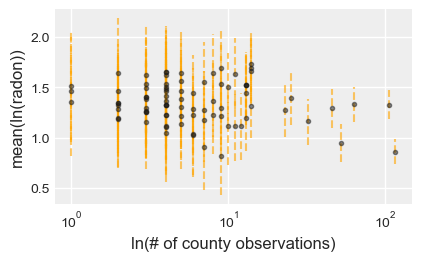

In [108]:
ax = sketch.figure(width=4.1, height=2.5)

# scatter plot
ax.plot(averages_features.coords['Tally'].values, averages_features['intercepts'].values, 'ok', markersize=3, alpha=0.5);

# high density interval lines
ax.vlines(
    hdi_features.coords['Tally'].values,
    hdi_features['intercepts'].sel(hdi='lower').values,
    hdi_features['intercepts'].sel(hdi='higher').values,
    color='orange',
    linestyles='dashed',
    alpha=0.6,
)

# logarithmic scale
ax.set(xscale='log')

# annotations
sketch.annotation(ax, Labels(title='', xlabel='ln(# of county observations)', ylabel='mean(ln(radon))'))

<br>

`Or`

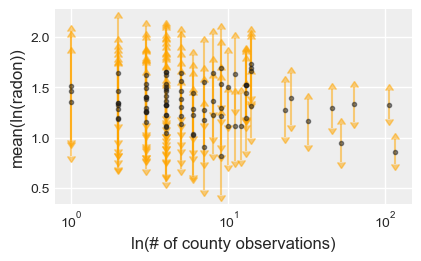

In [109]:
ax = sketch.figure(width=4.1, height=2.5)

# limits
X = np.concatenate((np.expand_dims(hdi_features['intercepts'].sel(hdi='lower').values, axis=0),
                    np.expand_dims(hdi_features['intercepts'].sel(hdi='higher').values, axis=0)))

points = averages_features['intercepts'].values
Y = np.concatenate((np.expand_dims(points - hdi_features['intercepts'].sel(hdi='lower').values, axis=0),
                    np.expand_dims(hdi_features['intercepts'].sel(hdi='higher').values - points, axis=0)))

# graph
ax.errorbar(averages_features.coords['Tally'].values, 
            averages_features['intercepts'].values, 
            Y, 
            uplims=True, lolims=True,
            ecolor='orange', 
            marker='o', markersize=3, markerfacecolor='k', markeredgecolor='k', 
            linestyle='',
            alpha=0.5)

# logarithmic scale
ax.set(xscale='log')

# annotations
sketch.annotation(ax, Labels(title='', xlabel='ln(# of county observations)', ylabel='mean(ln(radon))'))

<br>
<br>

**Clean-up**

In [110]:
del X, Y, hdi_features, averages_features

<br>
<br>

### Inference Data

In [111]:
partial_

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data

<br>
<br>
<br>

## Varying Intercept

### Model

In [112]:
vi = src.models.vi.VI(coords=coords, seed=RANDOM_SEED).exc(data=excerpt)


The shape of mu, whereby mu = intercepts[countyindex] + (beta * levelcode): (919,)
2022-12-03 20:33:29.400


likelihood
2022-12-03 20:33:29.419



<br>

An illustration of model

* Similarly: `pm.model_to_graphviz(vi)`

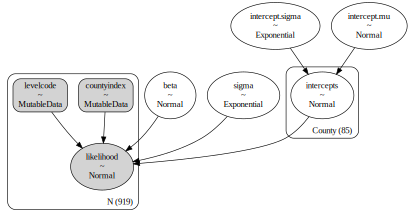

In [113]:
name = 'vi.gv'
dag.exc(model=vi, name=name)
graphviz.Source.from_file(filename=os.path.join(path, name))

<br>
<br>

### Inference

In [114]:
vi_ = src.models.inference.Inference(model=vi).exc()

Auto-assigning NUTS sampler...

Auto-assigning NUTS sampler...
2022-12-03 20:33:31.305

Initializing NUTS using jitter+adapt_diag...

Initializing NUTS using jitter+adapt_diag...
2022-12-03 20:33:31.307

Multiprocess sampling (4 chains in 4 jobs)

Multiprocess sampling (4 chains in 4 jobs)
2022-12-03 20:33:36.571

NUTS: [intercept.mu, intercept.sigma, intercepts, beta, sigma]

NUTS: [intercept.mu, intercept.sigma, intercepts, beta, sigma]
2022-12-03 20:33:36.572



Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 39 seconds.

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 39 seconds.
2022-12-03 20:34:16.125

Sampling: [beta, intercept.mu, intercept.sigma, intercepts, likelihood, sigma]

Sampling: [beta, intercept.mu, intercept.sigma, intercepts, likelihood, sigma]
2022-12-03 20:34:23.107

Sampling: [likelihood]

Sampling: [likelihood]
2022-12-03 20:34:23.352



In [115]:
vi_

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data

<br>
<br>

### Posterior Measures

<br>

**Summary**: The mean & deviation of the random intercepts, the common gradient $\beta$, the deviation $\sigma$ of the model's error

In [116]:
az.summary(vi_, var_names=['intercept.mu', 'intercept.sigma', 'beta', 'sigma'])

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
intercept.mu     1.492  0.052   1.395    1.588      0.001    0.001    1862.0   
intercept.sigma  0.321  0.045   0.234    0.403      0.001    0.001    1070.0   
beta            -0.664  0.067  -0.793   -0.541      0.001    0.001    2877.0   
sigma            0.727  0.017   0.694    0.759      0.000    0.000    4149.0   

                 ess_tail  r_hat  
intercept.mu       2503.0    1.0  
intercept.sigma    1272.0    1.0  
beta               3029.0    1.0  
sigma              3110.0    1.0

<br>
<br>

**Graphs**: The mean & deviation of the random intercepts, the common gradient $\beta$, the deviation $\sigma$ of the model's error

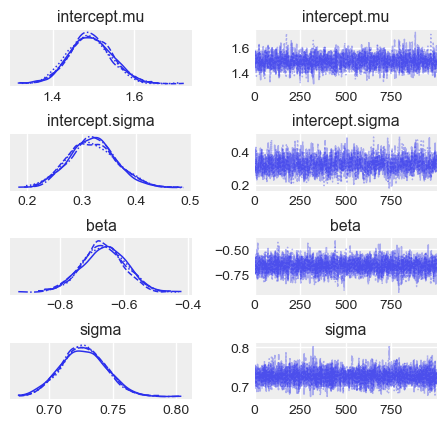

In [117]:
with vi:
    az.plot_trace(data=vi_, var_names=['intercept.mu', 'intercept.sigma', 'beta', 'sigma'], 
                 figsize=(4.35, 4.15))

<br>

Cf.

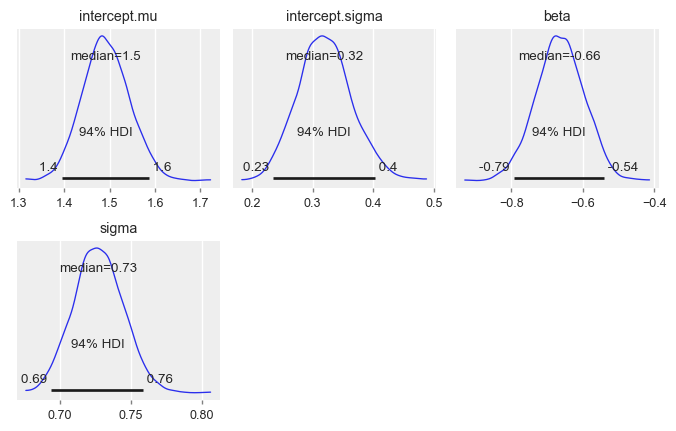

In [118]:
pm.plot_posterior(data=vi_, var_names=['intercept.mu', 'intercept.sigma', 'beta', 'sigma'], 
                 figsize=(6.65, 4.2), grid=(2, 3), point_estimate='median', textsize=9);

<br>
<br>

## Varying Intercept, Varying Gradient


$y_{_{i}} = \alpha_{_{i, j}} + \beta_{_{i, j}}x_{_{i}} + \epsilon_{_{i}}$

where 

> $i = 1, \ldots, N$
>
> $j = 1, \ldots, J$

and

> $\mathbf{\epsilon} \sim \mathcal{N}(0, \sigma^{\tiny{2}}_{_{y}}\mathbf{I})$

$i$ denotes the observation unit, there are $N$ observations. $\alpha_{_{i,j}}$ is the varying intercept term, and $\beta_{_{i,j}}$ is the varying gradient term, such that unit $i$ is a member of group $j$; there are $J$ groups.

In [119]:
va = src.models.va.VA(coords=coords, seed=RANDOM_SEED).exc(data=excerpt)


likelihood
2022-12-03 20:34:32.372



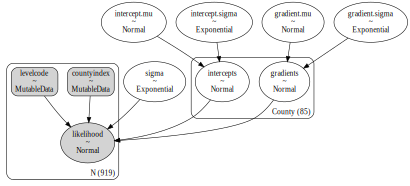

In [120]:
name = 'va.gv'
dag.exc(model=va, name=name)
graphviz.Source.from_file(filename=os.path.join(path, name))

In [121]:
va_ = src.models.inference.Inference(model=va).exc()

Auto-assigning NUTS sampler...

Auto-assigning NUTS sampler...
2022-12-03 20:34:35.115

Initializing NUTS using jitter+adapt_diag...

Initializing NUTS using jitter+adapt_diag...
2022-12-03 20:34:35.117

Multiprocess sampling (4 chains in 4 jobs)

Multiprocess sampling (4 chains in 4 jobs)
2022-12-03 20:34:41.924

NUTS: [intercept.mu, intercept.sigma, intercepts, gradient.mu, gradient.sigma, gradients, sigma]

NUTS: [intercept.mu, intercept.sigma, intercepts, gradient.mu, gradient.sigma, gradients, sigma]
2022-12-03 20:34:41.925



Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 56 seconds.

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 56 seconds.
2022-12-03 20:35:38.285

Sampling: [gradient.mu, gradient.sigma, gradients, intercept.mu, intercept.sigma, intercepts, likelihood, sigma]

Sampling: [gradient.mu, gradient.sigma, gradients, intercept.mu, intercept.sigma, intercepts, likelihood, sigma]
2022-12-03 20:35:45.931

Sampling: [likelihood]

Sampling: [likelihood]
2022-12-03 20:35:46.215



In [122]:
va_

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data

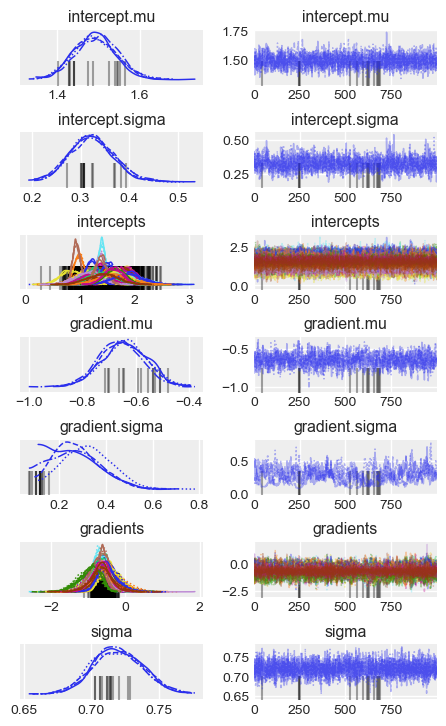

In [123]:
with va:
    az.plot_trace(data=va_, var_names=['intercept.mu', 'intercept.sigma', 'intercepts', 
                                       'gradient.mu', 'gradient.sigma', 'gradients', 'sigma'], 
                 figsize=(4.35, 7.15))

<br>
<br>

## Varying Intercept, Varying Gradient, Non-centred Parameterisation

In [124]:
rva = src.models.rva.RVA(coords=coords, seed=RANDOM_SEED).exc(data=excerpt)


likelihood
2022-12-03 20:36:18.465



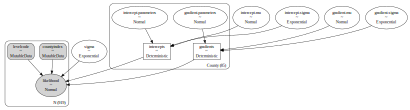

In [125]:
name = 'rva.gv'
dag.exc(model=rva, name=name)
graphviz.Source.from_file(filename=os.path.join(path, name))

In [126]:
rva_ = src.models.inference.Inference(model=rva).exc()

Auto-assigning NUTS sampler...

Auto-assigning NUTS sampler...
2022-12-03 20:36:21.222

Initializing NUTS using jitter+adapt_diag...

Initializing NUTS using jitter+adapt_diag...
2022-12-03 20:36:21.224

Multiprocess sampling (4 chains in 4 jobs)

Multiprocess sampling (4 chains in 4 jobs)
2022-12-03 20:36:27.564

NUTS: [intercept.mu, intercept.sigma, intercept.parameters, gradient.mu, gradient.sigma, gradient.parameters, sigma]

NUTS: [intercept.mu, intercept.sigma, intercept.parameters, gradient.mu, gradient.sigma, gradient.parameters, sigma]
2022-12-03 20:36:27.566



Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 61 seconds.

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 61 seconds.
2022-12-03 20:37:29.419

Sampling: [gradient.mu, gradient.parameters, gradient.sigma, intercept.mu, intercept.parameters, intercept.sigma, likelihood, sigma]

Sampling: [gradient.mu, gradient.parameters, gradient.sigma, intercept.mu, intercept.parameters, intercept.sigma, likelihood, sigma]
2022-12-03 20:37:37.245

Sampling: [likelihood]

Sampling: [likelihood]
2022-12-03 20:37:37.547



In [127]:
rva_

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data

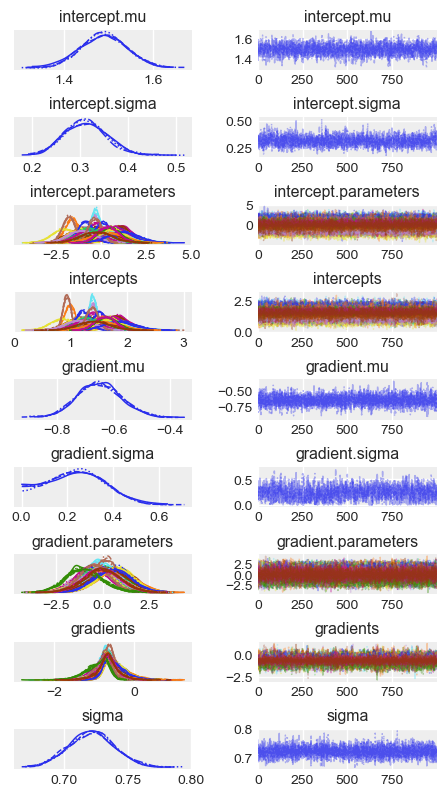

In [128]:
with rva:
    az.plot_trace(data=rva_, var_names=['intercept.mu', 'intercept.sigma', 'intercept.parameters', 'intercepts', 
                                       'gradient.mu', 'gradient.sigma', 'gradient.parameters', 'gradients', 
                                       'sigma'], 
                 figsize=(4.35, 7.85))

<br>
<br>
<br>

# Clean-up

In [129]:
os.getcwd()

'J:\\library\\plausibilities'

<br>

The cleaning-up scripts, in relation to the current directory.

In [130]:
%%bash

# The list of files in directory notebooks/
ls -l notebooks/

# Deleting the directed acyclic graphs of the models
rm -rf notebooks/*.gv
rm -rf notebooks/*.gv.pdf

# Inspect notebooks
ls -l notebooks/



total 207
-rw-r--r-- 1 Think 197121   539 Dec  3 20:29 complete.gv
-rw-r--r-- 1 Think 197121 23363 Dec  3 20:29 complete.gv.pdf
-rw-r--r-- 1 Think 197121   548 Dec  3 20:30 individual.gv
-rw-r--r-- 1 Think 197121 23691 Dec  3 20:30 individual.gv.pdf
-rw-r--r-- 1 Think 197121   806 Dec  3 20:32 partial.gv
-rw-r--r-- 1 Think 197121 25190 Dec  3 20:32 partial.gv.pdf
-rw-r--r-- 1 Think 197121  1441 Dec  3 20:36 rva.gv
-rw-r--r-- 1 Think 197121 26781 Dec  3 20:36 rva.gv.pdf
-rw-r--r-- 1 Think 197121   673 Dec  3 20:30 unpooled.gv
-rw-r--r-- 1 Think 197121 24872 Dec  3 20:30 unpooled.gv.pdf
-rw-r--r-- 1 Think 197121  1197 Dec  3 20:34 va.gv
-rw-r--r-- 1 Think 197121 26468 Dec  3 20:34 va.gv.pdf
-rw-r--r-- 1 Think 197121   983 Dec  3 20:33 vi.gv
-rw-r--r-- 1 Think 197121 26159 Dec  3 20:33 vi.gv.pdf
total 0
